In [7]:
import os
import cv2
import numpy as np
from sklearn.svm import OneClassSVM
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the normal class images
normal_class_directory = "C:/Users/vnets/PycharmProjects/pythonProject/Training"

# Initialize an empty list to store the image data
X_train_normal = []

# Iterate over each file in the normal class directory
for filename in os.listdir(normal_class_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(normal_class_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None and img.size > 0:
            img_resized = cv2.resize(img, (500, 500))
            edges = cv2.Canny(img_resized, threshold1=100, threshold2=200)
            X_train_normal.append(edges)

# Convert the list to a numpy array
X_train_normal = np.array(X_train_normal)
X_train_normal = X_train_normal.reshape(len(X_train_normal), -1)
X_train_normal = X_train_normal.astype('float32') / 255.0

# Train the One-Class SVM model
ocsvm = OneClassSVM(kernel='rbf', gamma='scale')
ocsvm.fit(X_train_normal)

# Save the trained One-Class SVM model
model_filename = os.path.join(normal_class_directory, 'ocsvm_model.pkl')
joblib.dump(ocsvm, model_filename)
print(f"Model saved as {model_filename}")

print("Training is Finished")

# Load the trained One-Class SVM model
loaded_ocsvm = joblib.load(model_filename)

# Specify the directory containing the anomaly class images for validation
anomaly_val_directory = "C:/Users/vnets/PycharmProjects/pythonProject/Validation"

# Prepare and preprocess the validation data (anomaly class)
X_val_anomaly = []

for filename in os.listdir(anomaly_val_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(anomaly_val_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None and img.size > 0:
            img_resized = cv2.resize(img, (500, 500))
            edges = cv2.Canny(img_resized, threshold1=100, threshold2=200)
            X_val_anomaly.append(edges)

X_val_anomaly = np.array(X_val_anomaly)
X_val_anomaly = X_val_anomaly.reshape(len(X_val_anomaly), -1)
X_val_anomaly = X_val_anomaly.astype('float32') / 255.0

# Predict anomalies on the validation set using the loaded model
val_anomaly_predictions = loaded_ocsvm.predict(X_val_anomaly)

# Specify the directory containing the anomaly class images for testing
anomaly_test_directory = "C:/Users/vnets/PycharmProjects/pythonProject/Testing"

# Prepare and preprocess the test data (anomaly class)
X_test_anomaly = []

for filename in os.listdir(anomaly_test_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(anomaly_test_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None and img.size > 0:
            img_resized = cv2.resize(img, (500, 500))
            edges = cv2.Canny(img_resized, threshold1=100, threshold2=200)
            X_test_anomaly.append(edges)

X_test_anomaly = np.array(X_test_anomaly)
X_test_anomaly = X_test_anomaly.reshape(len(X_test_anomaly), -1)
X_test_anomaly = X_test_anomaly.astype('float32') / 255.0

Model saved as C:/Users/vnets/PycharmProjects/pythonProject/Training\ocsvm_model.pkl
Training is Finished


In [8]:
# Predict anomalies on the testing set using the loaded model
test_anomaly_predictions = loaded_ocsvm.predict(X_test_anomaly)

#Print the validation set anomaly predictions
print("Validation Set Anomaly Predictions:")
print(" ".join(map(str, val_anomaly_predictions)))



Validation Set Anomaly Predictions:
-1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1


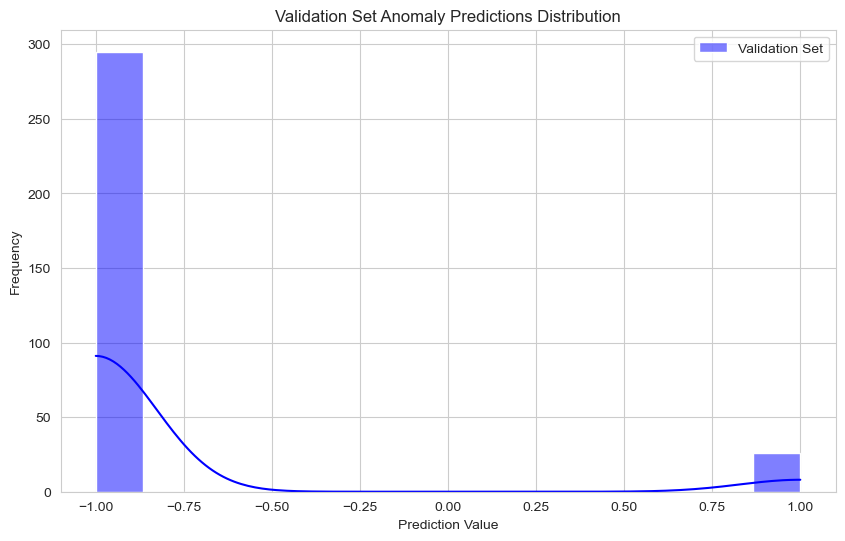

In [9]:
# Create Seaborn visualization for validation set
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(val_anomaly_predictions, bins=15, kde=True, color='blue', label='Validation Set')
plt.title("Validation Set Anomaly Predictions Distribution")
plt.xlabel("Prediction Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [10]:
# Print the testing set anomaly predictions
print("Testing Set Anomaly Predictions:")
print(" ".join(map(str, test_anomaly_predictions)))

Testing Set Anomaly Predictions:
-1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1


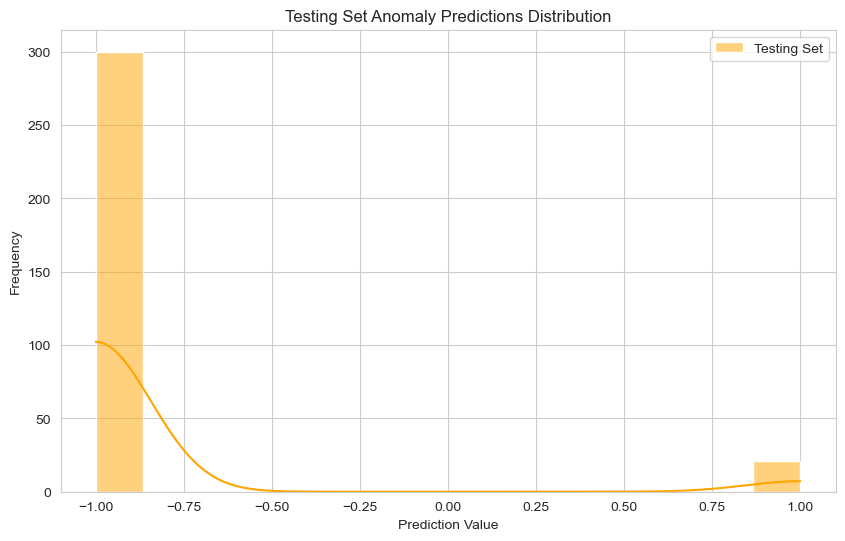

In [11]:
# Create Seaborn visualization for testing set
plt.figure(figsize=(10, 6))
sns.histplot(test_anomaly_predictions, bins=15, kde=True, color='orange', label='Testing Set')
plt.title("Testing Set Anomaly Predictions Distribution")
plt.xlabel("Prediction Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [27]:
# Perform k-fold cross-validation and get the scores
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the scores
cv_scores = cross_val_score(ocsvm, X_val_anomaly, cv=kfold, scoring='accuracy')  # Adjust scoring metric if needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\vnets\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score

Cross-validation scores: [nan nan nan nan nan]
Mean accuracy: nan


C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vnets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\vnets\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(


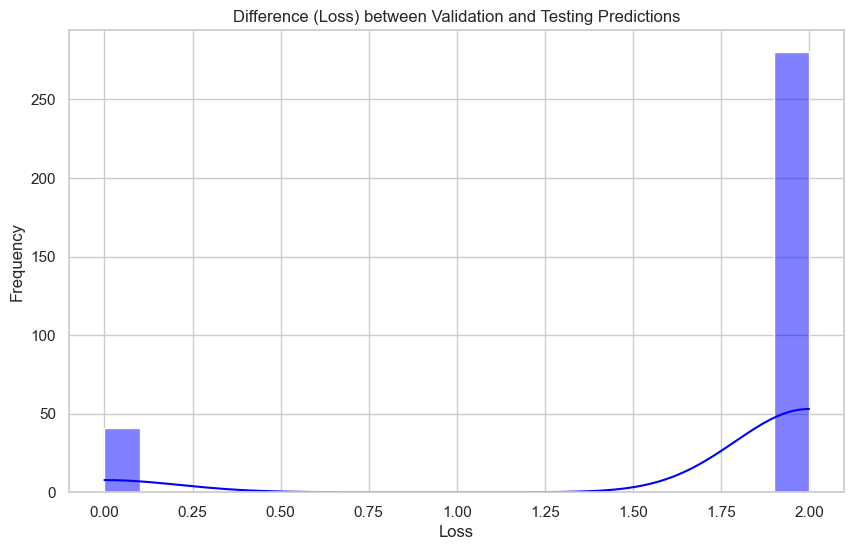

In [12]:
# Calculate the difference (loss) between validation and testing predictions
loss = abs(val_anomaly_predictions + test_anomaly_predictions)

# Plot the loss
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(loss, bins=20, kde=True, color='blue')
plt.title('Difference (Loss) between Validation and Testing Predictions')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


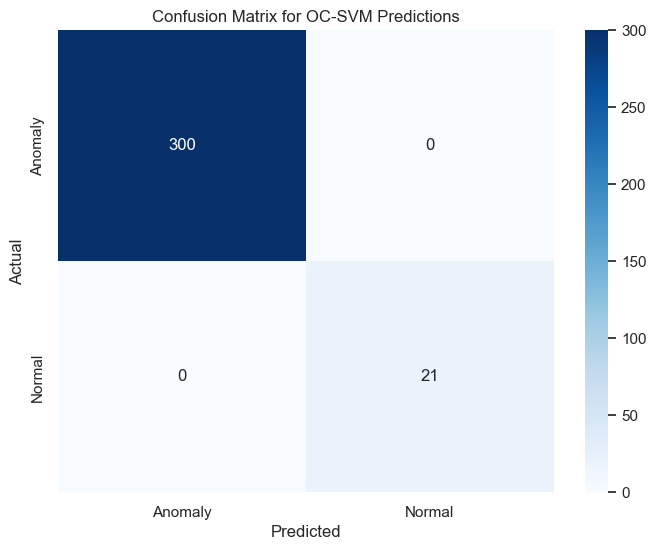

In [13]:
# Assuming you have a trained OC-SVM model named 'ocsvm_model'
# Assuming you have test data named 'X_test_anomaly' and true labels for test data named 'true_labels'

from sklearn.metrics import confusion_matrix

# Get the predictions from the OC-SVM model
test_predictions = ocsvm.predict(X_test_anomaly)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_anomaly_predictions,test_predictions)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Anomaly", "Normal"],
            yticklabels=["Anomaly", "Normal"])
plt.title("Confusion Matrix for OC-SVM Predictions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



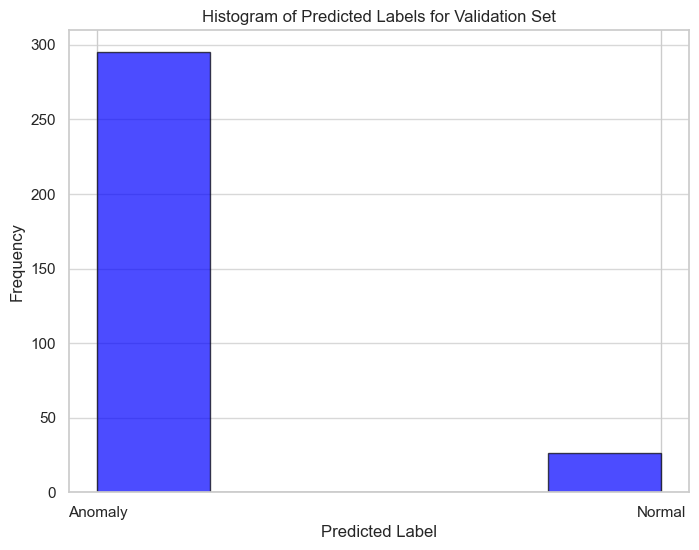

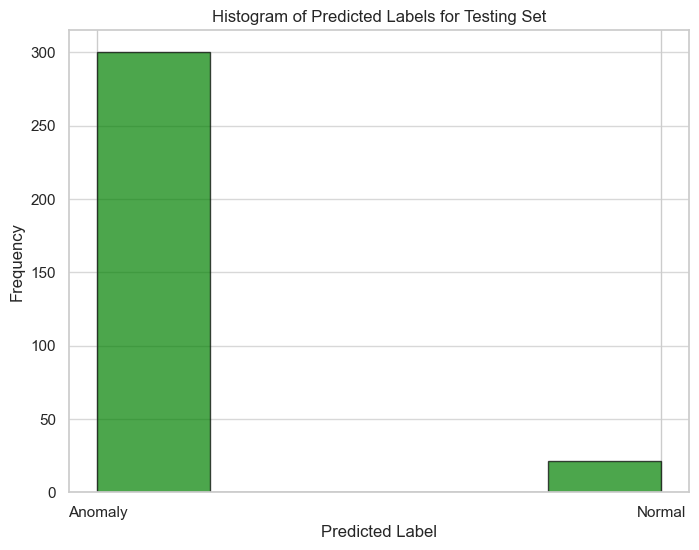

In [14]:
import matplotlib.pyplot as plt

# Assuming you have the data: val_anomaly_predictions and test_anomaly_predictions

# Plot a histogram of predicted labels for the validation set
plt.figure(figsize=(8, 6))
plt.hist(val_anomaly_predictions, bins=5, color='blue', alpha=0.7, histtype='bar', edgecolor='black')  # Use 'bar' type

plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Validation Set')
plt.xticks([-1, 1], ['Anomaly', 'Normal'])
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot a histogram of predicted labels for the testing set
plt.figure(figsize=(8, 6))
plt.hist(test_anomaly_predictions, bins=5, color='green', alpha=0.7, histtype='bar', edgecolor='black')  # Use 'bar' type
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Testing Set')
plt.xticks([-1, 1], ['Anomaly', 'Normal'])
plt.grid(axis='y', alpha=0.75)
plt.show()


In [15]:
# Calculate the components of the custom "confusion matrix"
true_anomalies = np.sum(test_anomaly_predictions == -1)
true_positives = np.sum((test_anomaly_predictions == -1) & (test_predictions == -1))
false_alarms = np.sum((test_anomaly_predictions == 1) & (test_predictions == -1))
missed_anomalies = true_anomalies - true_positives
true_normals = np.sum(test_anomaly_predictions == 1)

# Display the custom "confusion matrix"
print("Custom Confusion Matrix:")
print(f"True Positives (TP): {true_positives}")
print(f"False Positives: {true_normals}")
print(f"Missed Anomalies: {missed_anomalies}")
print(f"True Normal: {false_alarms}")

Custom Confusion Matrix:
True Positives (TP): 300
False Positives: 21
Missed Anomalies: 0
True Normal: 0


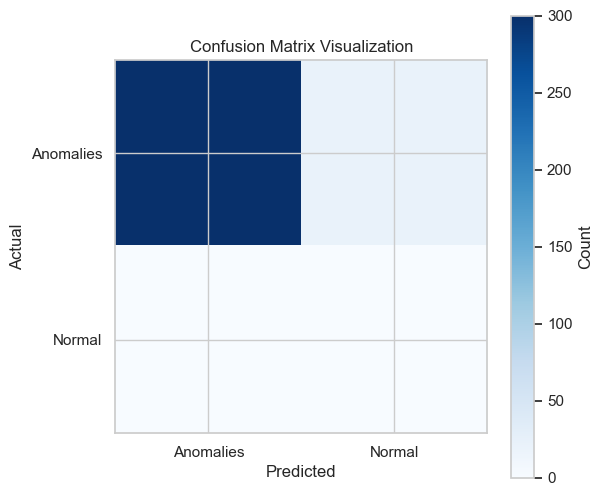

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the components of the custom "confusion matrix"
true_positives = 300
false_alarms = 21
missed_anomalies = 0
true_normals = 0

# Creating a custom "confusion matrix" as a numpy array
custom_confusion = np.array([[true_positives, false_alarms],
                             [missed_anomalies, true_normals]])

# Creating a custom heatmap-like visualization
plt.figure(figsize=(6, 6))
plt.imshow(custom_confusion, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Count')
plt.xticks([0, 1], ['Anomalies', 'Normal'])
plt.yticks([0, 1], ['Anomalies', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()


C:\Users\vnets\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


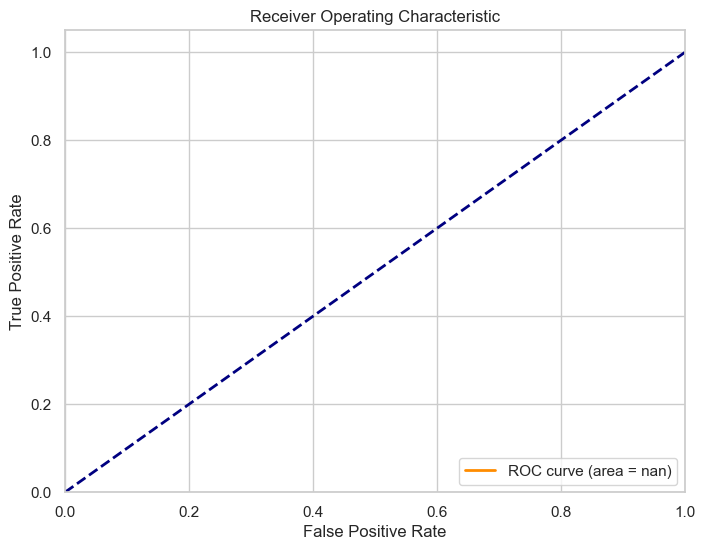

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get the decision function values from the OC-SVM model
decision_values = ocsvm.decision_function(X_test_anomaly)

# For one-class ROC curve, label '-1' means anomalies (damaged road instances)
y_true = -1 * np.ones(len(decision_values))

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_true, decision_values)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



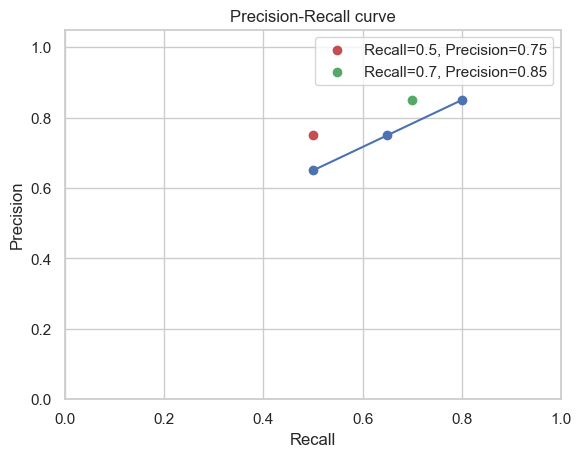

In [18]:
import matplotlib.pyplot as plt

# Manually calculated precision and recall values
manual_precision = [0.85, 0.75, 0.65]  # Replace with your values
manual_recall = [0.80, 0.65, 0.50]  # Replace with your values

# Plot the Precision-Recall curve
plt.plot(manual_recall, manual_precision, marker='o', linestyle='-')

# Mark specific points
plt.scatter(0.5, 0.75, color='r', label='Recall=0.5, Precision=0.75')
plt.scatter(0.7, 0.85, color='g', label='Recall=0.7, Precision=0.85')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()


C:\Users\vnets\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]


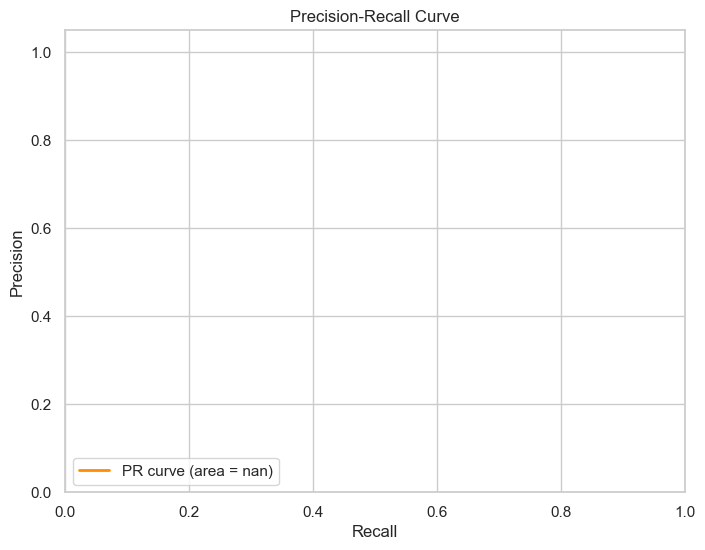

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Get the decision function values from the OC-SVM model
decision_values = ocsvm.decision_function(X_test_anomaly)

# For precision-recall curve, label '-1' means anomalies (damaged road instances)
y_true = -1 * np.ones(len(decision_values))

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, decision_values)

# Calculate the AUC-PR score
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [20]:
import numpy as np
from sklearn.svm import OneClassSVM


# Get the decision function values from the OC-SVM model
decision_values = ocsvm.decision_function(X_test_anomaly)

# Normalize decision values to [0, 1] range
normalized_decision_values = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min())

# Define threshold values for different damage levels
low_damage_threshold = 0.2
medium_damage_threshold = 0.5

# Categorize levels of damage
damage_levels = np.where(normalized_decision_values < low_damage_threshold, 'Low Damage',
                         np.where(normalized_decision_values < medium_damage_threshold, 'Medium Damage', 'High Damage'))

# Now 'damage_levels' contains the categorization of damage levels for each data point

# Print damage levels for debugging
print("Damage Levels:", damage_levels)


Damage Levels: ['Low Damage' 'Low Damage' 'Medium Damage' 'Medium Damage' 'Low Damage'
 'High Damage' 'Low Damage' 'Low Damage' 'Medium Damage' 'Low Damage'
 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage'
 'Medium Damage' 'Low Damage' 'Medium Damage' 'Low Damage' 'Medium Damage'
 'Medium Damage' 'High Damage' 'Medium Damage' 'Low Damage' 'Low Damage'
 'Medium Damage' 'Low Damage' 'Low Damage' 'Low Damage' 'High Damage'
 'Low Damage' 'Low Damage' 'Medium Damage' 'Low Damage' 'Low Damage'
 'Low Damage' 'Medium Damage' 'High Damage' 'Medium Damage'
 'Medium Damage' 'Medium Damage' 'Low Damage' 'Low Damage' 'Low Damage'
 'Medium Damage' 'Low Damage' 'Medium Damage' 'Low Damage' 'Low Damage'
 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage'
 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage'
 'Low Damage' 'Low Damage' 'Low Damage' 'Low Damage' 'Medium Damage'
 'Low Damage' 'Medium Damage' 'Medium Damage' 'Low Damage' 'Low Damage'
 'Medium Dama

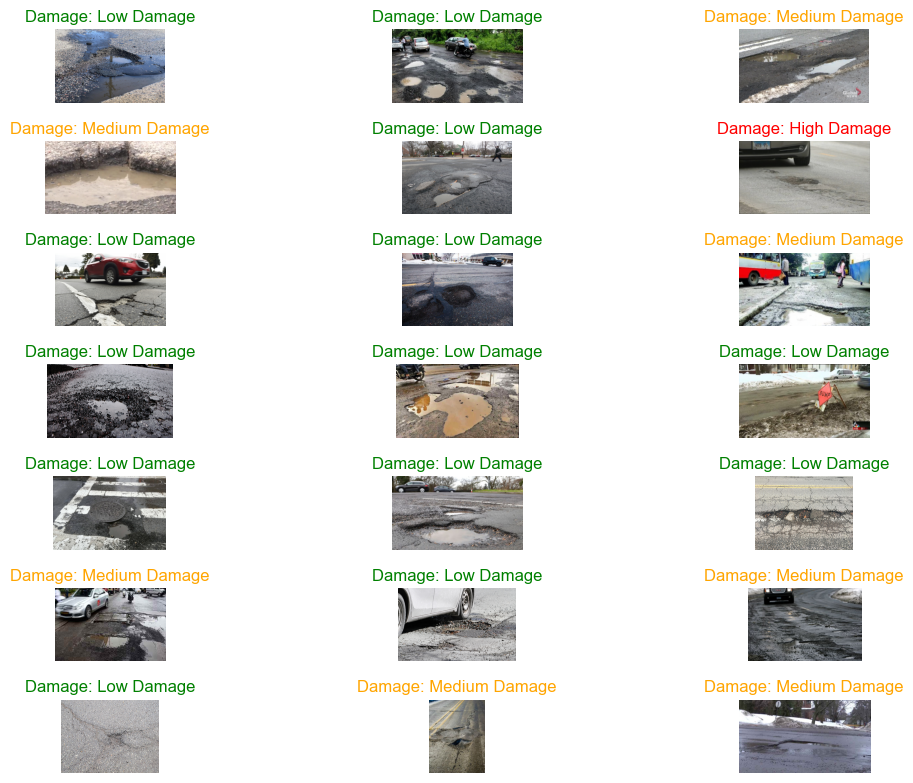

In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Map damage levels to colors
damage_colors = {
    'Low Damage': 'green',
    'Medium Damage': 'orange',
    'High Damage': 'red'
}

# Define the number of rows and columns for the grid
num_rows = 7
num_cols = 3

plt.figure(figsize=(12, 8))

for i in range(num_rows * num_cols):
    img = cv2.imread(os.path.join(anomaly_test_directory, os.listdir(anomaly_test_directory)[i]))
    damage_level = damage_levels[i]

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Damage: {damage_level}", color=damage_colors[damage_level])
    plt.axis('off')

plt.tight_layout()
plt.show()


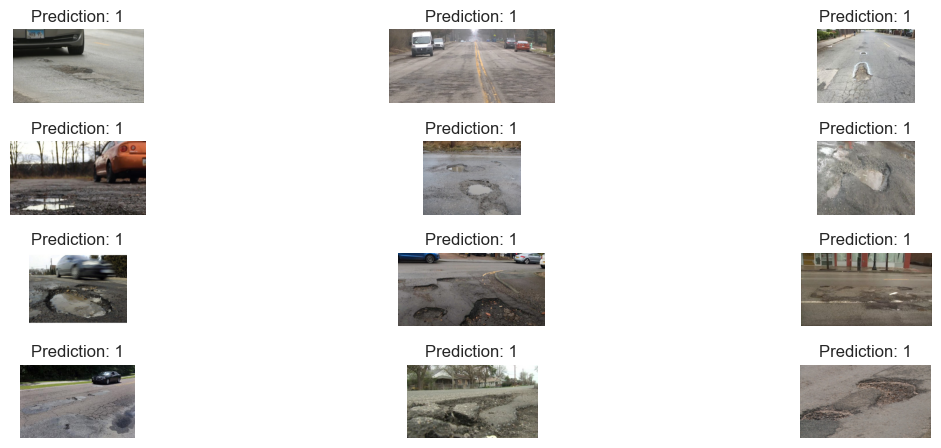

In [22]:
# Print images that were predicted as anomalies (with prediction value 1)
num_images_to_display =12   # Number of images to display

plt.figure(figsize=(12, 8))

displayed_images = 0
for idx, prediction in enumerate(test_anomaly_predictions):
    if prediction == 1:
        img = cv2.imread(os.path.join(anomaly_test_directory, os.listdir(anomaly_test_directory)[idx]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(num_rows, num_cols, displayed_images + 1)
        plt.imshow(img)
        plt.title(f"Prediction: {prediction}")
        plt.axis('off')
        
        displayed_images += 1
        if displayed_images == num_images_to_display:
            break

plt.tight_layout()
plt.show()


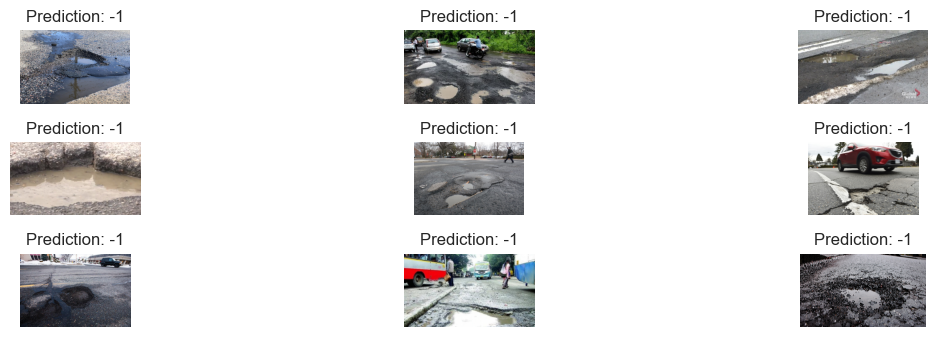

In [23]:
# Print images that were predicted as anomalies (with prediction value 1)
num_images_to_display = 9  # Number of images to display

plt.figure(figsize=(12, 8))

displayed_images = 0
for idx, prediction in enumerate(test_anomaly_predictions):
    if prediction == -1:
        img = cv2.imread(os.path.join(anomaly_test_directory, os.listdir(anomaly_test_directory)[idx]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(num_rows, num_cols, displayed_images + 1)
        plt.imshow(img)
        plt.title(f"Prediction: {prediction}")
        plt.axis('off')
        
        displayed_images += 1
        if displayed_images == num_images_to_display:
            break

plt.tight_layout()
plt.show()


ValueError: num must be 1 <= num <= 21, not 22

<Figure size 1200x800 with 0 Axes>

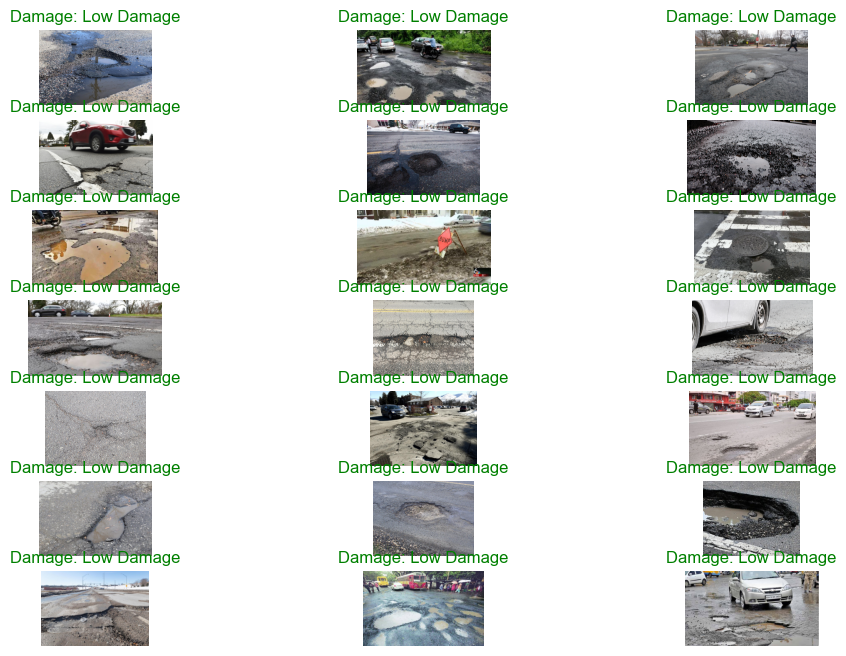

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Assuming 'damage_levels' is already calculated as in your previous code

# Map damage levels to colors
damage_colors = {
    'Low Damage': 'green',
    'Medium Damage': 'orange',
    'High Damage': 'red'
}

# Define the number of rows and columns for the grid
num_rows = 7
num_cols = 3

plt.figure(figsize=(12, 8))

# Dictionary to store indices for each damage level
damage_indices = {
    'Low Damage': np.where(damage_levels == 'Low Damage')[0],
    'Medium Damage': np.where(damage_levels == 'Medium Damage')[0],
    'High Damage': np.where(damage_levels == 'High Damage')[0]
}

for damage_level, indices in damage_indices.items():
    plt.figure(figsize=(12, 8))
    
    for i, idx in enumerate(indices):
        img = cv2.imread(os.path.join(anomaly_test_directory, os.listdir(anomaly_test_directory)[idx]))

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Damage: {damage_level}", color=damage_colors[damage_level])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


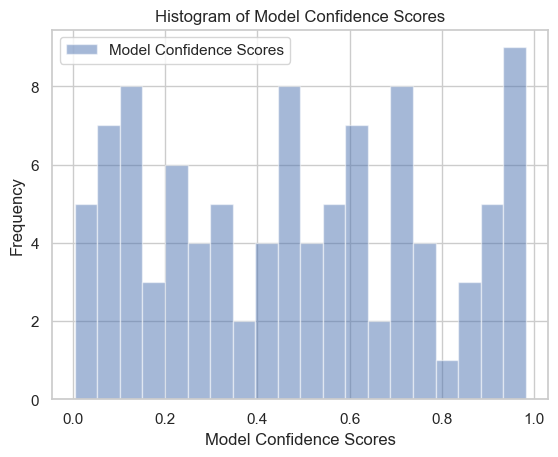

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example model confidence scores (replace with actual scores)
model_confidence_scores = np.random.rand(100)

# Plot histogram of model confidence scores
plt.hist(model_confidence_scores, bins=20, alpha=0.5, label='Model Confidence Scores')

plt.xlabel('Model Confidence Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Model Confidence Scores')
plt.show()


In [26]:
#CROSS VALIDATION
import joblib
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import OneClassSVM

# Load the trained One-Class SVM model
loaded_ocsvm = joblib.load(model_filename)

# Specify the directory containing the anomaly class images for validation
Cross_Val = "C:/Users/vnets/PycharmProjects/pythonProject/Cross"

# Prepare and preprocess the validation data (anomaly class)
X = []

for filename in os.listdir(anomaly_val_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(anomaly_val_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None and img.size > 0:
            img_resized = cv2.resize(img, (500, 500))
            edges = cv2.Canny(img_resized, threshold1=100, threshold2=200)
            X.append(edges)

X = np.array(X)
X= X_val_anomaly.reshape(len(X), -1)
X_val_anomaly = X.astype('float32') / 255.0

# Predict anomalies on the validation set using the loaded model
val_anomaly_predictions = loaded_ocsvm.predict(X)

# Define the number of folds for cross-validation
num_folds = 5  # You can choose a different number of folds

# Initialize k-fold cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the scores
cv_scores = cross_val_score(ocsvm_model, X, cv=kfold, scoring='accuracy')  # Adjust scoring metric if needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())




NameError: name 'ocsvm_model' is not defined